In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [37]:
# data.drop('rssi', axis=1, inplace=True)
# data.drop('rssi1', axis=1, inplace=True)
# data.drop('rssi2', axis=1, inplace=True)
# data.drop('rssi3', axis=1, inplace=True)
# data.drop(columns=['coord1', 'coord2', "timestamps", 'csi_len', 'channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'payload_length', 'block_length', 'with_receiver'], axis=1, inplace=True)

data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude'], inplace=True)

In [38]:
features = ['rssi', 'rssi1', 'rssi2', 'subcarriers', 
            'ant1_phase', 'ant2_phase']
features = data.columns
X = data[features]

scaler = StandardScaler()

X[features] = scaler.fit_transform(X[features])

In [39]:
for i in range(1, X.shape[0]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    explained_variance = pca.explained_variance_ratio_
    # print(f'Explained variance by each component: {explained_variance}')
    print(f"PCA with {i} components, sum is {sum(explained_variance)}.")
    
    if (sum(explained_variance) >= 0.80):
        break

X_pca = pca.fit_transform(X)

PCA with 1 components, sum is 0.22589319955352274.
PCA with 2 components, sum is 0.39156735340036875.
PCA with 3 components, sum is 0.4952661763887571.
PCA with 4 components, sum is 0.5719803571543091.
PCA with 5 components, sum is 0.6451766494484164.
PCA with 6 components, sum is 0.7118449494240787.
PCA with 7 components, sum is 0.7784504852686792.
PCA with 8 components, sum is 0.8435689505724531.
PCA with 9 components, sum is 0.9037163253860369.


In [40]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.2258932  0.16567415 0.10369882 0.07671418 0.07319629 0.0666683
 0.06660554 0.06511847 0.06014737]


In [41]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [42]:
print(features)

Index(['csi_len', 'channel', 'err_info', 'noise_floor', 'rate', 'bandWidth',
       'num_tones', 'nr', 'nc', 'rssi', 'rssi1', 'rssi2', 'rssi3',
       'payload_length', 'block_length', 'subcarriers', 'ant1_phase',
       'ant2_phase', 'with_receiver', 'ant1_amplitude_cluster',
       'ant2_amplitude_cluster'],
      dtype='object')


In [43]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=features)

print(loading_df)


    csi_len   channel  err_info   noise_floor      rate     bandWidth  \
0  0.509651 -0.001209 -0.016990 -0.000000e+00  0.481939 -0.000000e+00   
1  0.108130  0.002216  0.003710  1.110223e-16  0.034711  0.000000e+00   
2 -0.192299 -0.004256  0.020469  0.000000e+00 -0.189908  0.000000e+00   
3  0.075312  0.001294 -0.023126 -1.110223e-16  0.138088  0.000000e+00   
4 -0.003228  0.011351 -0.011448 -2.775558e-16 -0.006938  8.673617e-17   
5 -0.001270  0.997955 -0.037591  1.552578e-16  0.004439 -7.806256e-17   
6  0.012472  0.040898  0.996476 -1.318390e-16  0.009244 -5.551115e-17   
7 -0.008214  0.047305 -0.064474  5.551115e-17 -0.101568 -4.163336e-17   
8 -0.002650  0.002097  0.002394 -6.418477e-17 -0.005778 -0.000000e+00   

      num_tones            nr        nc      rssi  ...     rssi2  \
0 -0.000000e+00 -0.000000e+00  0.509651 -0.103059  ... -0.097346   
1  3.469447e-18  2.168404e-19  0.108130  0.606208  ...  0.583608   
2 -2.775558e-17  1.734723e-18 -0.192299 -0.027076  ... -0.026842 

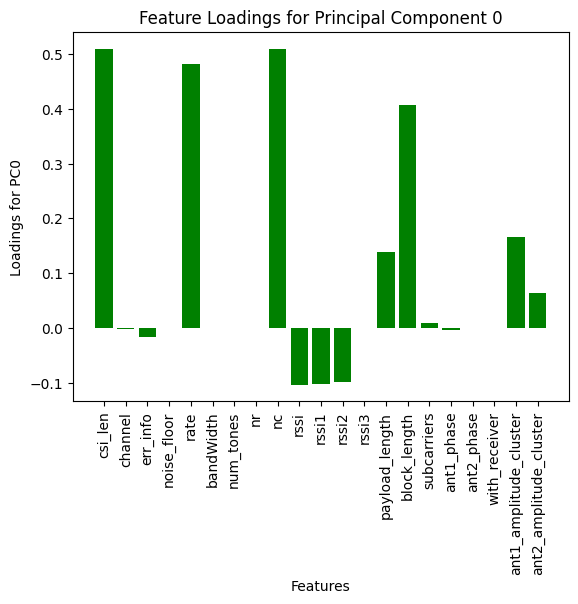

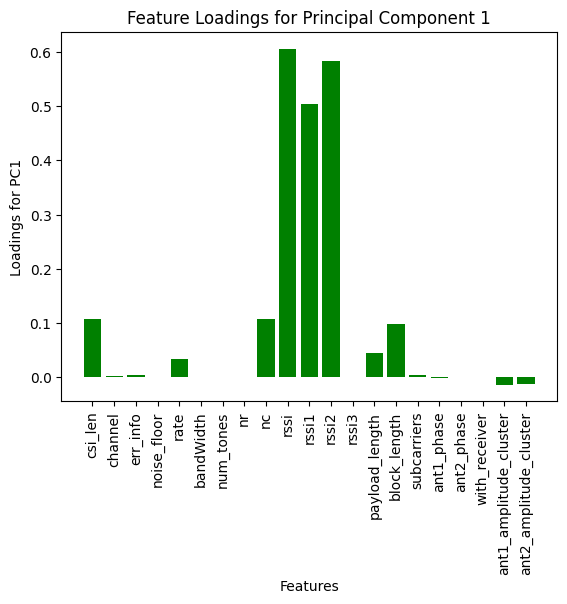

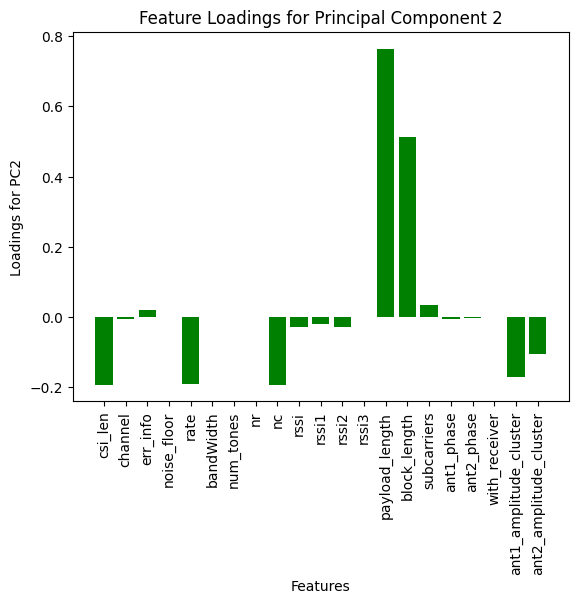

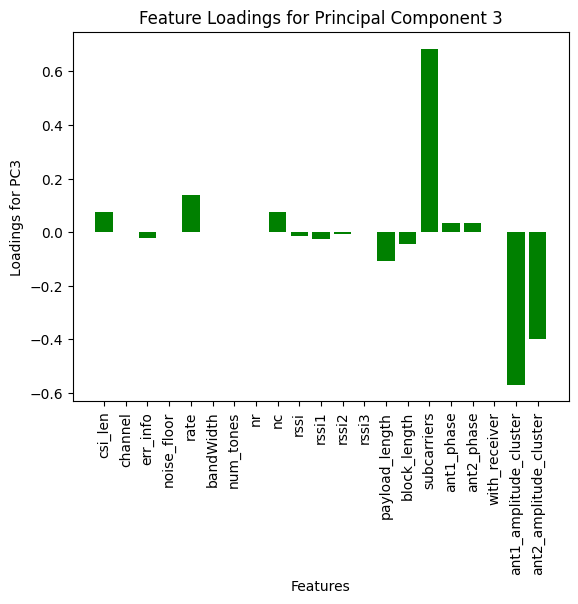

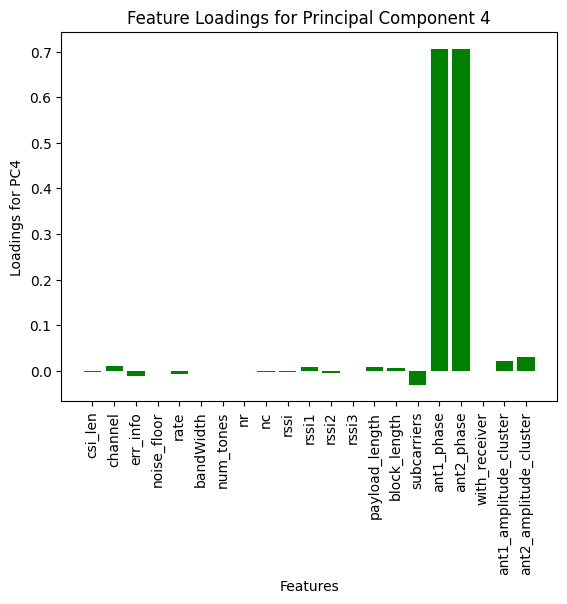

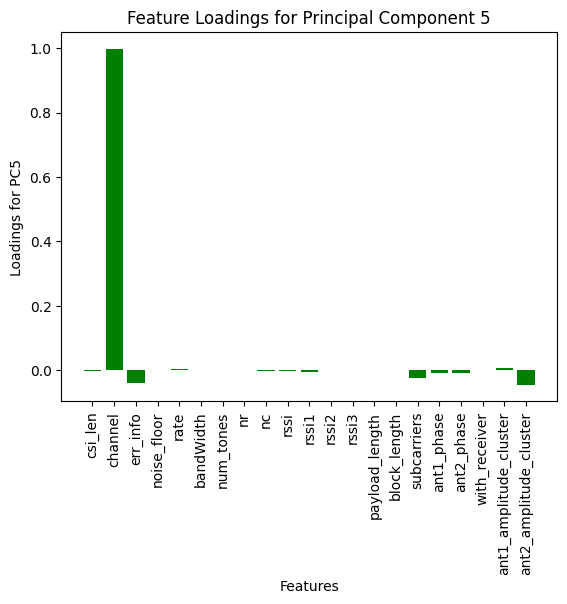

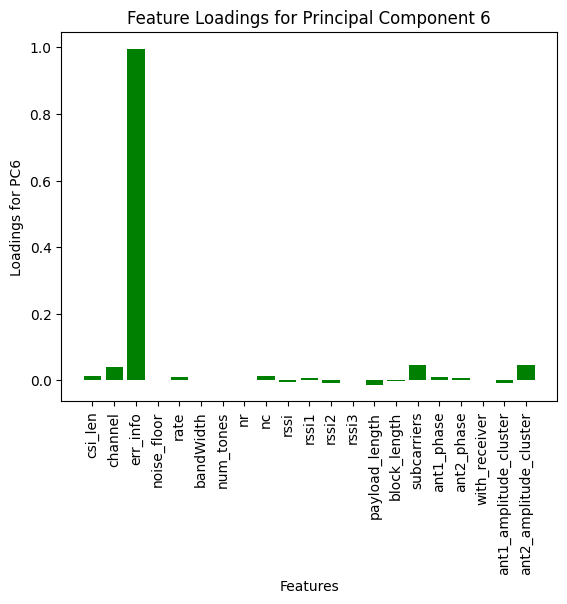

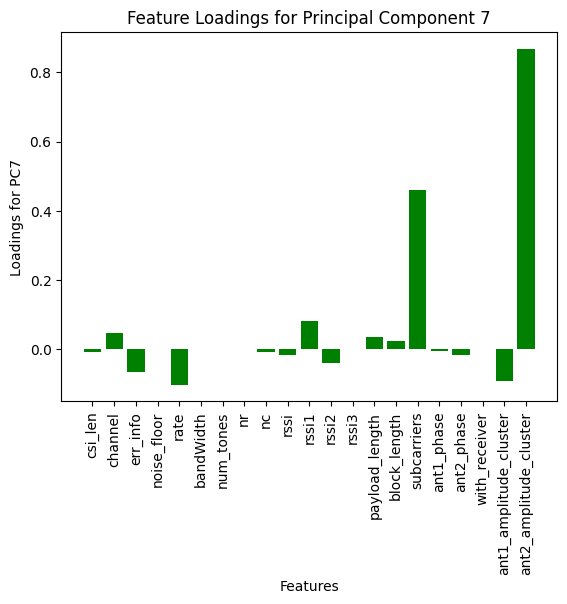

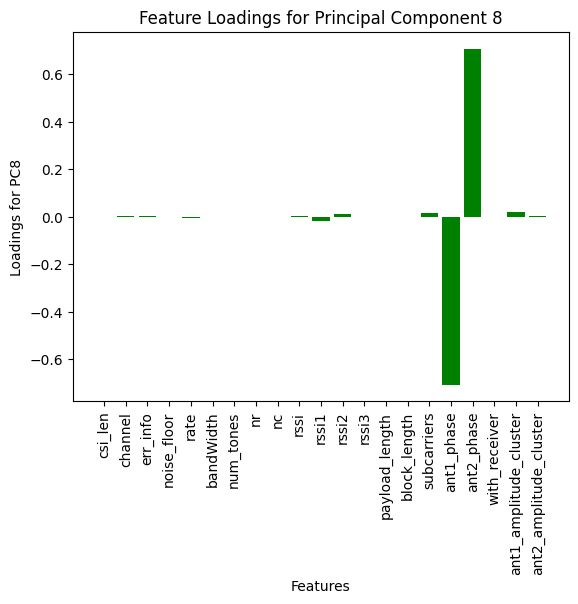

In [44]:
for j in range(i):
    plt.bar(features, loadings[j], color='g')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Loadings for PC{j}')
    plt.title(f'Feature Loadings for Principal Component {j}')
    plt.show()


In [45]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.2258932  0.39156735 0.49526618 0.57198036 0.64517665 0.71184495
 0.77845049 0.84356895 0.90371633]


In [46]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [0.2258932  0.16567415 0.10369882 0.07671418 0.07319629 0.0666683
 0.06660554 0.06511847 0.06014737 0.0525813 ]
SUM: 0.9562976265973221


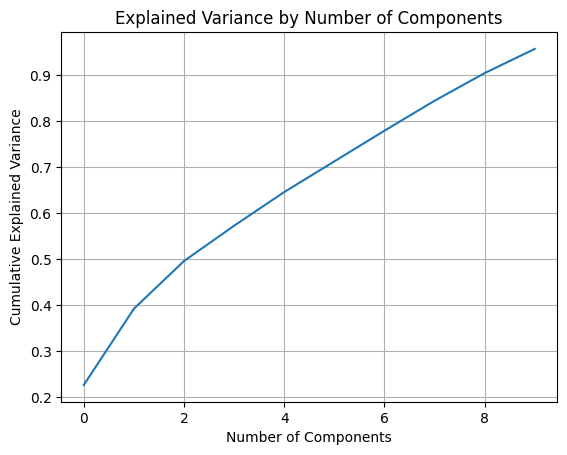

In [47]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [48]:
# Remove exact duplicates
# df = pd.DataFrame(X_reduced)
# X_reduced_deduped = df.drop_duplicates()
